#Chicago No-Heat Problem Project



###Import Additional Libraries for Spatial Join

In [2]:
!pip install mapclassify

In [3]:
!pip3 install keplergl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 17.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922315 sha256=809ce3354b0c8756a85da8c7ea103a5c3f757e097b4d27ca6e845cf535f565a9
  Stored in directory: /root/.cache/pip/wheels/e5/e9/db/b8b8f2fcb5cb1cd7268d88959fce267bc00697cb8f50dcd0d9
Successfully built keplergl


###Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import geopandas as gpd
from keplergl import KeplerGl

### Project Prompt and Data Import
### More Chicagoans lacked heat in January than any month since 2019 amid historic cold

1. Go to the Chicago Data Portal: https://data.cityofchicago.org/
2. Find each dataset. Building violations, ward, and police.
3. Add a data notes section to your github readme. This should include information about the source of your data, where it came from, how often it is updated, and the period of data it contains (e.g. 2010-present or 2012 to 2019)
4. Lastly, test that this import works. This may take a while as the dataset is large.

In [5]:
build = pd.read_csv('https://data.cityofchicago.org/resource/22u3-xenr.csv?$limit=3000000')

In [6]:
#you can use any of these
ward = gpd.read_file('https://data.cityofchicago.org/api/geospatial/sp34-6z76?method=export&format=GeoJSON')
police = gpd.read_file('https://data.cityofchicago.org/api/geospatial/fthy-xz3r?method=export&format=GeoJSON')

###Testing That the Imports of build, ward, and Police Dataset Worked

In [7]:
#Testing that this import of the 'build' dataset works using .head()
build.head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,address,street_number,street_direction,street_name,street_type,property_group,ssa,latitude,longitude,location
0,7152896,2024-04-22T07:59:40.000,2024-04-22T00:00:00.000,CN138056,OPEN,NaN,"DEBRIS, EXCESSIVE",OTHER : :OTHER,BASEMENT AT 5801 S./ - JUNK AND REFUSE ACCUMUL...,Remove accumulation of refuse and debris and k...,...,2949 W 58TH ST,2949,W,58TH,ST,23584,59.0,41.788043,-87.698037,"\n, \n(41.78804349247664, -87.69803653091098)"
1,7152887,2024-04-22T07:24:30.000,2024-04-22T00:00:00.000,CN190019,OPEN,NaN,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING - NO RESPONSE, UNABLE TO ...",Arrange for inspection of premises. (13-12-100),...,3510 W 63RD ST,3510,W,63RD,ST,369075,3.0,41.778956,-87.710901,"\n, \n(41.778955959474544, -87.71090106516559)"
2,7152922,2024-04-22T11:07:30.000,2024-04-22T00:00:00.000,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,EAST ELEVATION / EXERIOR WALLS - MASONRY FRACT...,Failed to maintain the exterior walls of a bui...,...,6234 S DORCHESTER AVE,6234,S,DORCHESTER,AVE,361146,NaN,41.781312,-87.591520,"\n, \n(41.781312130233516, -87.59151967204005)"
3,7153020,2024-04-22T14:21:40.000,2024-04-22T00:00:00.000,CN070014,OPEN,NaN,REPAIR EXTERIOR STAIR,OTHER : :OTHER,WEST ELEVATION / 2 CAR FRAME GARAGE / OVERHEAD...,Failed to maintain exterior stairways in safe ...,...,9356 S PAXTON AVE,9356,S,PAXTON,AVE,474372,NaN,41.724509,-87.570677,"\n, \n(41.72450871353321, -87.57067655582085)"
4,7152893,2024-04-22T07:59:40.000,2024-04-22T00:00:00.000,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,NORTH ELEVATION 2ND FLOOR STEP CRACKS (EAST END).,Failed to maintain the exterior walls of a bui...,...,2949 W 58TH ST,2949,W,58TH,ST,23584,59.0,41.788043,-87.698037,"\n, \n(41.78804349247664, -87.69803653091098)"


In [8]:
#Testing that this import of the 'build' dataset works using .tail()
build.tail()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,address,street_number,street_direction,street_name,street_type,property_group,ssa,latitude,longitude,location
1907694,1345277,2007-07-31T15:01:06.000,2006-01-01T00:00:00.000,CN107035,OPEN,NaN,MAINTAIN EXIT SIGN ILLUMINATED,NaN,335 EXIT SIGN DON'T WORK,Failed to maintain all exit signs illuminated ...,...,5108 S CALUMET AVE,5108,S,CALUMET,AVE,327758,52.0,41.801766,-87.617887,"\n, \n(41.80176555860429, -87.6178867686376)"
1907695,1552606,2008-07-09T14:02:10.000,2006-01-01T00:00:00.000,PL157047,COMPLIED,2008-05-09T00:00:00.000,STOP LEAKING WATER,NaN,WATER STAINS CEILING OF RESTAURANT,Stop leaking water. (18-29-102.3),...,1512 N LA SALLE DR,1512,N,LA SALLE,DR,4263,48.0,41.909590,-87.633245,"\n, \n(41.90959014268417, -87.63324548383488)"
1907696,1430846,2008-01-24T13:55:53.000,2006-01-01T00:00:00.000,CN107025,COMPLIED,2007-11-28T00:00:00.000,INSTALL EXIT SIGN,NaN,ALL CORRIDORS AND STAIRWELL EXIT SIGN OUT,Failed to install standard internally illumina...,...,6501 S LOWE AVE,6501,S,LOWE,AVE,19693,NaN,41.776074,-87.640625,"\n, \n(41.7760739361563, -87.64062455203374)"
1907697,1345308,2007-07-31T15:02:01.000,2006-01-01T00:00:00.000,CN061024,OPEN,NaN,SUBMIT 2 COPY STRUCTURAL RPT,NaN,"EXTERIOR WALL 331-35 1ST FLOOR, FLOORING",Failed to maintain building or structure in a ...,...,5108 S CALUMET AVE,5108,S,CALUMET,AVE,327758,52.0,41.801766,-87.617887,"\n, \n(41.80176555860429, -87.6178867686376)"
1907698,1345881,2006-04-11T08:18:56.000,2006-01-01T00:00:00.000,RF301051,OPEN,NaN,ARRANGE FOR RE-INSPECTION,NaN,NaN,Arrange for refrigeration/air conditioning rei...,...,2203 W DEVON AVE,2203,W,DEVON,AVE,565750,43.0,41.997701,-87.685147,"\n, \n(41.99770079922752, -87.6851465642111)"


In [9]:
#Testing that this import of the 'build' dataset works using .columns
build.columns

Index(['id', 'violation_last_modified_date', 'violation_date',
       'violation_code', 'violation_status', 'violation_status_date',
       'violation_description', 'violation_location',
       'violation_inspector_comments', 'violation_ordinance', 'inspector_id',
       'inspection_number', 'inspection_status', 'inspection_waived',
       'inspection_category', 'department_bureau', 'address', 'street_number',
       'street_direction', 'street_name', 'street_type', 'property_group',
       'ssa', 'latitude', 'longitude', 'location'],
      dtype='object')

In [10]:
#Testing that this import of the 'build' dataset works using .shape
build.shape

(1907699, 26)

In [11]:
#Testing that this import of the 'build' dataset works using .info()
build.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907699 entries, 0 to 1907698
Data columns (total 26 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id                            int64  
 1   violation_last_modified_date  object 
 2   violation_date                object 
 3   violation_code                object 
 4   violation_status              object 
 5   violation_status_date         object 
 6   violation_description         object 
 7   violation_location            object 
 8   violation_inspector_comments  object 
 9   violation_ordinance           object 
 10  inspector_id                  object 
 11  inspection_number             int64  
 12  inspection_status             object 
 13  inspection_waived             object 
 14  inspection_category           object 
 15  department_bureau             object 
 16  address                       object 
 17  street_number                 int64  
 18  street_direction      

In [12]:
#Testing that this import of the 'ward' dataset works using .head()
ward.head()

,shape_area,shape_leng,ward,geometry
0,116096507.849,93073.3408379,12,"MULTIPOLYGON (((-87.69623 41.85755, -87.69625 ..."
1,103143638.546,97901.3238332,16,"MULTIPOLYGON (((-87.66289 41.79884, -87.66289 ..."
2,65588297.917,82183.6948197,15,"MULTIPOLYGON (((-87.69818 41.81729, -87.69817 ..."
3,137290356.97,90105.1956185,20,"MULTIPOLYGON (((-87.65524 41.80883, -87.65524 ..."
4,49733459.1385,38122.6928259,49,"MULTIPOLYGON (((-87.66420 42.02126, -87.66419 ..."


In [13]:
#Testing that this import of the 'ward' dataset works using .info()
ward.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   shape_area  50 non-null     object  
 1   shape_leng  50 non-null     object  
 2   ward        50 non-null     object  
 3   geometry    50 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 1.7+ KB


In [14]:
#Testing that this import of the 'police' dataset works using .head()
police.head()

,dist_label,dist_num,geometry
0,17TH,17,"MULTIPOLYGON (((-87.71067 41.99737, -87.71067 ..."
1,20TH,20,"MULTIPOLYGON (((-87.66029 41.99092, -87.66029 ..."
2,31ST,31,"MULTIPOLYGON (((-87.82818 41.98384, -87.82816 ..."
3,31ST,31,"MULTIPOLYGON (((-87.83365 41.97535, -87.83366 ..."
4,19TH,19,"MULTIPOLYGON (((-87.64492 41.96973, -87.64431 ..."


In [15]:
#Testing that this import of the 'police' dataset works using .info()
police.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dist_label  25 non-null     object  
 1   dist_num    25 non-null     object  
 2   geometry    25 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 728.0+ bytes


### Converting Data Type(s)

In [16]:
#Converting 'violation_date' to datetime
build['violation_date'] = pd.to_datetime(build['violation_date'])

In [17]:
#Adding 'month' colum and converting to .dt.month
build['month'] = build['violation_date'].dt.month

In [18]:
#Adding 'year' colum and converting to .dt.year datetime
build['year'] = build['violation_date'].dt.year

In [19]:
#Checking to see if the two columns were created by using .head()
build.head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,street_direction,street_name,street_type,property_group,ssa,latitude,longitude,location,month,year
0,7152896,2024-04-22T07:59:40.000,2024-04-22,CN138056,OPEN,NaN,"DEBRIS, EXCESSIVE",OTHER : :OTHER,BASEMENT AT 5801 S./ - JUNK AND REFUSE ACCUMUL...,Remove accumulation of refuse and debris and k...,...,W,58TH,ST,23584,59.0,41.788043,-87.698037,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024
1,7152887,2024-04-22T07:24:30.000,2024-04-22,CN190019,OPEN,NaN,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING - NO RESPONSE, UNABLE TO ...",Arrange for inspection of premises. (13-12-100),...,W,63RD,ST,369075,3.0,41.778956,-87.710901,"\n, \n(41.778955959474544, -87.71090106516559)",4,2024
2,7152922,2024-04-22T11:07:30.000,2024-04-22,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,EAST ELEVATION / EXERIOR WALLS - MASONRY FRACT...,Failed to maintain the exterior walls of a bui...,...,S,DORCHESTER,AVE,361146,NaN,41.781312,-87.591520,"\n, \n(41.781312130233516, -87.59151967204005)",4,2024
3,7153020,2024-04-22T14:21:40.000,2024-04-22,CN070014,OPEN,NaN,REPAIR EXTERIOR STAIR,OTHER : :OTHER,WEST ELEVATION / 2 CAR FRAME GARAGE / OVERHEAD...,Failed to maintain exterior stairways in safe ...,...,S,PAXTON,AVE,474372,NaN,41.724509,-87.570677,"\n, \n(41.72450871353321, -87.57067655582085)",4,2024
4,7152893,2024-04-22T07:59:40.000,2024-04-22,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,NORTH ELEVATION 2ND FLOOR STEP CRACKS (EAST END).,Failed to maintain the exterior walls of a bui...,...,W,58TH,ST,23584,59.0,41.788043,-87.698037,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024


In [20]:
#Checking to make sure converting data types from above worked by using .info()
build.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907699 entries, 0 to 1907698
Data columns (total 28 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   id                            int64         
 1   violation_last_modified_date  object        
 2   violation_date                datetime64[ns]
 3   violation_code                object        
 4   violation_status              object        
 5   violation_status_date         object        
 6   violation_description         object        
 7   violation_location            object        
 8   violation_inspector_comments  object        
 9   violation_ordinance           object        
 10  inspector_id                  object        
 11  inspection_number             int64         
 12  inspection_status             object        
 13  inspection_waived             object        
 14  inspection_category           object        
 15  department_bureau             ob

### Filtering For Heat Violations

In [21]:
#Adding a column to identify heat violations with .np.where
build['is_heat'] = np.where(build['violation_description'] == 'HEAT UNIT ADEQUATELY', 'heat_violation', 'not_heat_violation')

In [22]:
#Checking to see that the new column got added by using .columns
build.columns

Index(['id', 'violation_last_modified_date', 'violation_date',
       'violation_code', 'violation_status', 'violation_status_date',
       'violation_description', 'violation_location',
       'violation_inspector_comments', 'violation_ordinance', 'inspector_id',
       'inspection_number', 'inspection_status', 'inspection_waived',
       'inspection_category', 'department_bureau', 'address', 'street_number',
       'street_direction', 'street_name', 'street_type', 'property_group',
       'ssa', 'latitude', 'longitude', 'location', 'month', 'year', 'is_heat'],
      dtype='object')

In [23]:
#Checking the data frame to see the new column included by using .head()
build.head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,street_name,street_type,property_group,ssa,latitude,longitude,location,month,year,is_heat
0,7152896,2024-04-22T07:59:40.000,2024-04-22,CN138056,OPEN,NaN,"DEBRIS, EXCESSIVE",OTHER : :OTHER,BASEMENT AT 5801 S./ - JUNK AND REFUSE ACCUMUL...,Remove accumulation of refuse and debris and k...,...,58TH,ST,23584,59.0,41.788043,-87.698037,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024,not_heat_violation
1,7152887,2024-04-22T07:24:30.000,2024-04-22,CN190019,OPEN,NaN,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING - NO RESPONSE, UNABLE TO ...",Arrange for inspection of premises. (13-12-100),...,63RD,ST,369075,3.0,41.778956,-87.710901,"\n, \n(41.778955959474544, -87.71090106516559)",4,2024,not_heat_violation
2,7152922,2024-04-22T11:07:30.000,2024-04-22,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,EAST ELEVATION / EXERIOR WALLS - MASONRY FRACT...,Failed to maintain the exterior walls of a bui...,...,DORCHESTER,AVE,361146,NaN,41.781312,-87.591520,"\n, \n(41.781312130233516, -87.59151967204005)",4,2024,not_heat_violation
3,7153020,2024-04-22T14:21:40.000,2024-04-22,CN070014,OPEN,NaN,REPAIR EXTERIOR STAIR,OTHER : :OTHER,WEST ELEVATION / 2 CAR FRAME GARAGE / OVERHEAD...,Failed to maintain exterior stairways in safe ...,...,PAXTON,AVE,474372,NaN,41.724509,-87.570677,"\n, \n(41.72450871353321, -87.57067655582085)",4,2024,not_heat_violation
4,7152893,2024-04-22T07:59:40.000,2024-04-22,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,NORTH ELEVATION 2ND FLOOR STEP CRACKS (EAST END).,Failed to maintain the exterior walls of a bui...,...,58TH,ST,23584,59.0,41.788043,-87.698037,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024,not_heat_violation


In [24]:
#Using .value_counts() to find the amount of heat violations to date
build['is_heat'].value_counts()

is_heat
not_heat_violation    1895030
heat_violation          12669
Name: count, dtype: int64

In [25]:
#From the code right above, since Jan 2019, there were 12,668 heat violations

###Combining 'month' and 'year' Into a New Column

In [26]:
#Combining month and year for future use for our first graph
build['month_year'] = build['month'].astype(str) + '-' + build['year'].astype(str)

In [27]:
#Checking to see if the column got added via .columns()
build.columns

Index(['id', 'violation_last_modified_date', 'violation_date',
       'violation_code', 'violation_status', 'violation_status_date',
       'violation_description', 'violation_location',
       'violation_inspector_comments', 'violation_ordinance', 'inspector_id',
       'inspection_number', 'inspection_status', 'inspection_waived',
       'inspection_category', 'department_bureau', 'address', 'street_number',
       'street_direction', 'street_name', 'street_type', 'property_group',
       'ssa', 'latitude', 'longitude', 'location', 'month', 'year', 'is_heat',
       'month_year'],
      dtype='object')

In [28]:
#Checking to see if the column got added via .head()
build.head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,street_type,property_group,ssa,latitude,longitude,location,month,year,is_heat,month_year
0,7152896,2024-04-22T07:59:40.000,2024-04-22,CN138056,OPEN,NaN,"DEBRIS, EXCESSIVE",OTHER : :OTHER,BASEMENT AT 5801 S./ - JUNK AND REFUSE ACCUMUL...,Remove accumulation of refuse and debris and k...,...,ST,23584,59.0,41.788043,-87.698037,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024,not_heat_violation,4-2024
1,7152887,2024-04-22T07:24:30.000,2024-04-22,CN190019,OPEN,NaN,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING - NO RESPONSE, UNABLE TO ...",Arrange for inspection of premises. (13-12-100),...,ST,369075,3.0,41.778956,-87.710901,"\n, \n(41.778955959474544, -87.71090106516559)",4,2024,not_heat_violation,4-2024
2,7152922,2024-04-22T11:07:30.000,2024-04-22,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,EAST ELEVATION / EXERIOR WALLS - MASONRY FRACT...,Failed to maintain the exterior walls of a bui...,...,AVE,361146,NaN,41.781312,-87.591520,"\n, \n(41.781312130233516, -87.59151967204005)",4,2024,not_heat_violation,4-2024
3,7153020,2024-04-22T14:21:40.000,2024-04-22,CN070014,OPEN,NaN,REPAIR EXTERIOR STAIR,OTHER : :OTHER,WEST ELEVATION / 2 CAR FRAME GARAGE / OVERHEAD...,Failed to maintain exterior stairways in safe ...,...,AVE,474372,NaN,41.724509,-87.570677,"\n, \n(41.72450871353321, -87.57067655582085)",4,2024,not_heat_violation,4-2024
4,7152893,2024-04-22T07:59:40.000,2024-04-22,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,NORTH ELEVATION 2ND FLOOR STEP CRACKS (EAST END).,Failed to maintain the exterior walls of a bui...,...,ST,23584,59.0,41.788043,-87.698037,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024,not_heat_violation,4-2024


###F-string and Loop

In [29]:
#f-string
f_string = {'id': [7150845, 7150850, 7150685],
        'location': ['\n, \n(41.92627862895956, -87.70220923867026)', '\n, \n(41.97900967970449, -87.84630141906825)', '\n, \n(41.82531992987547, -87.72395999659746)'],
        'violation_date': ['2024-04-17', '2024-04-17', '2024-04-17'],
        'is_heat': ['not_heat_violation', 'not_heat_violation', 'not_heat_violation']}

In [30]:
#loop
for index, row in build.iterrows():
    print(f"id: {row['id']}, location: {row['location']}, violation_date: {row['violation_date']}, is_heat: {row['is_heat']}")

Streaming output truncated to the last 5000 lines.
id: 1215498, location: 
,  
(41.798314140774025, -87.66606117246732), violation_date: 2006-01-03 00:00:00, is_heat: not_heat_violation
id: 1274313, location: 
,  
(41.87600555471963, -87.70093720128135), violation_date: 2006-01-03 00:00:00, is_heat: not_heat_violation
id: 1228283, location: 
,  
(41.81028098533763, -87.64421718887397), violation_date: 2006-01-03 00:00:00, is_heat: not_heat_violation
id: 1248285, location: 
,  
(41.786155307863105, -87.70349314057083), violation_date: 2006-01-03 00:00:00, is_heat: not_heat_violation
id: 1245364, location: 
,  
(41.750194073808096, -87.64144079473893), violation_date: 2006-01-03 00:00:00, is_heat: not_heat_violation
id: 1275052, location: 
,  
(41.96823261185367, -87.7186510600225), violation_date: 2006-01-03 00:00:00, is_heat: not_heat_violation
id: 1223517, location: 
,  
(41.88746909997041, -87.70159921152201), violation_date: 2006-01-03 00:00:00, is_heat: not_heat_violation
id: 13626

###Beginning Useful Code for Graph 1

- Using filtering to create new df called 'graph_no_heat'
- The filtered dataset will be useful information for eventually downloading and using for data in our first graph

In [31]:
#Creating new df called 'graph_no_heat' that only includes instances whose 'violation_code' is equal to 'CN132016' via using simpled filtering
graph_no_heat = build[build['violation_code'] == 'CN132016']

In [32]:
#Checking to see the new df out via .head()
graph_no_heat.head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,street_type,property_group,ssa,latitude,longitude,location,month,year,is_heat,month_year
29,7152814,2024-04-22T11:24:24.000,2024-04-22,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,INTERIOR:001 :ENTIRE SINGLE FAMILY HOME AND BA...,"2316 W / ALL ROOMS - 57F AT 11:10AM, BASEMENT ...",Heat dwelling unit adequately from September 1...,...,ST,255742,NaN,41.871463,-87.684518,"\n, \n(41.87146304476723, -87.68451837447857)",4,2024,heat_violation,4-2024
659,7148900,2024-04-15T09:05:32.000,2024-04-15,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,INTERIOR:002 :,1263 S CENTRAL PARK APT 2 / ALL ROOMS 72F DEGR...,Heat dwelling unit adequately from September 1...,...,AVE,15707,NaN,41.864450,-87.715218,"\n, \n(41.864450173563014, -87.71521848941047)",4,2024,heat_violation,4-2024
1358,7145591,2024-04-08T14:44:35.000,2024-04-08,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,INTERIOR:002 :,2207 S / APT.2 / ALL ROOMS - 64F DEGREES; AT (...,Heat dwelling unit adequately from September 1...,...,AVE,26373,NaN,41.851364,-87.718497,"\n, \n(41.85136381385009, -87.71849743242603)",4,2024,heat_violation,4-2024
1399,7146237,2024-04-08T13:05:35.000,2024-04-08,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,OTHER : :OTHER,CB132016 - 2ND FLOOR BEDROOMS TEMP WAS 66F AT ...,Heat dwelling unit adequately from September 1...,...,BLVD,397833,NaN,41.770705,-87.658975,"\n, \n(41.77070465111202, -87.65897462365271)",4,2024,heat_violation,4-2024
1697,7144544,2024-04-04T11:01:03.000,2024-04-04,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,INTERIOR:001 :,APT. 7655-1ST FLOOR - ROOM TEMPERATURES WERE 4...,Heat dwelling unit adequately from September 1...,...,ST,423052,NaN,41.754399,-87.650055,"\n, \n(41.754399006032756, -87.65005481133355)",4,2024,heat_violation,4-2024


In [33]:
#Checking to how many heat violations there were by using .shape
graph_no_heat.shape

(12669, 30)

In [34]:
#Doing another filter this time using df 'graph_no_heat' to make sure it only includes instances whose year is either in 2019 or greater
#Also making it persist by updating the 'graph_no_heat' dataframe to include this filter
graph_no_heat = graph_no_heat[graph_no_heat['year'] >= 2019]

In [35]:
#Sorting values in 'graph_no_heat' by ascending 'month' and 'year'
#Using this sorting method and .head() to check and see if code worked and got us only instances in or after 2019, which it did
graph_no_heat.sort_values(by=['month','year'], ascending=[True,True]).head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,street_type,property_group,ssa,latitude,longitude,location,month,year,is_heat,month_year
299161,6184879,2019-01-31T12:48:53.000,2019-01-31,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,INTERIOR:002 :,LIVING ROOM 56 DEGREES ...,Heat dwelling unit adequately from September 1...,...,BLVD,258726,NaN,41.867473,-87.719415,"\n, \n(41.86747296014765, -87.71941453167678)",1,2019,heat_violation,1-2019
299163,6233688,2019-04-15T11:20:09.000,2019-01-31,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,8253 S BRANDON AVE SR # 19-00138065,FRONT RM 67 DEGREE'S KITCHEN 69.3 DEGREE'S BED...,Heat dwelling unit adequately from September 1...,...,AVE,435680,NaN,41.745029,-87.546546,"\n, \n(41.74502927977207, -87.54654574085)",1,2019,heat_violation,1-2019
299166,6184884,2019-07-08T09:14:46.000,2019-01-31,CN132016,COMPLIED,2019-03-25T00:00:00.000,HEAT UNIT ADEQUATELY,INTERIOR:001 :,APARTMENT 1545 W. 3RD FL WEST - ROOM TEMPERATU...,Heat dwelling unit adequately from September 1...,...,ST,21148,69.0,41.746614,-87.662693,"\n, \n(41.74661444871254, -87.66269308028988)",1,2019,heat_violation,1-2019
299171,6184982,2019-03-28T16:01:12.000,2019-01-31,CN132016,COMPLIED,2019-03-28T00:00:00.000,HEAT UNIT ADEQUATELY,OTHER : :OTHER,APT. - 1S / ROOM TEMPERATURES : LIVING ROOM 62...,Heat dwelling unit adequately from September 1...,...,AVE,344237,NaN,41.791634,-87.617664,"\n, \n(41.79163383184086, -87.6176642503175)",1,2019,heat_violation,1-2019
299175,6185697,2019-10-07T09:47:07.000,2019-01-31,CN132016,COMPLIED,2019-10-03T00:00:00.000,HEAT UNIT ADEQUATELY,OTHER : :OTHER BL01039,UNIT 1529-2CD ... IT WAS 51 DEGREES ON 1/31/20...,Heat dwelling unit adequately from September 1...,...,BLVD,13366,NaN,42.005293,-87.668924,"\n, \n(42.005292705104516, -87.66892358419032)",1,2019,heat_violation,1-2019


In [36]:
#Using this sorting method and .tail() to check and see if code worked and got us only instances in or after 2019, which it did
graph_no_heat.sort_values(by=['month','year'], ascending=[True,True]).tail()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,street_type,property_group,ssa,latitude,longitude,location,month,year,is_heat,month_year
16709,7081178,2023-12-01T09:09:48.000,2023-12-01,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,OTHER : :OTHER,CB132016- 2ND FLOOR APT. - TEMP WAS 64.6 F AT ...,Heat dwelling unit adequately from September 1...,...,BLVD,409230,NaN,41.763587,-87.636913,"\n, \n(41.763586741389446, -87.63691299047849)",12,2023,heat_violation,12-2023
16757,7081456,2023-12-01T14:18:35.000,2023-12-01,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,OTHER : :OTHER,APT 3W / ROOM TEMPERATURES : BEDROOM 1 65F AT ...,Heat dwelling unit adequately from September 1...,...,DR,430041,51.0,41.749724,-87.614787,"\n, \n(41.749724008407824, -87.6147865425443)",12,2023,heat_violation,12-2023
16774,7082130,2024-01-28T14:11:02.000,2023-12-01,CN132016,COMPLIED,2024-01-24T00:00:00.000,HEAT UNIT ADEQUATELY,OTHER : :OTHER,11017 APT 3 / ROOM TEMPERATURES : BATHROOM 65F...,Heat dwelling unit adequately from September 1...,...,AVE,510744,NaN,41.694042,-87.612047,"\n, \n(41.69404217904332, -87.61204651936008)",12,2023,heat_violation,12-2023
16807,7081535,2024-02-15T09:15:06.000,2023-12-01,CN132016,COMPLIED,2024-02-15T00:00:00.000,HEAT UNIT ADEQUATELY,INTERIOR:003 :,APARTMENT 306 HEAT BEING CUT OFF DURING THE DA...,Heat dwelling unit adequately from September 1...,...,AVE,17916,NaN,41.821912,-87.603629,"\n, \n(41.82191213113417, -87.60362922312027)",12,2023,heat_violation,12-2023
16814,7081533,2024-02-15T09:13:58.000,2023-12-01,CN132016,COMPLIED,2024-02-06T00:00:00.000,HEAT UNIT ADEQUATELY,INTERIOR:003 :BL00876,APARTMENT 306 HEAT BEING CUT OFF DURING THE DA...,Heat dwelling unit adequately from September 1...,...,AVE,17916,NaN,41.821912,-87.603629,"\n, \n(41.82191213113417, -87.60362922312027)",12,2023,heat_violation,12-2023


In [37]:
#Checking the shape of the df by using .shape to see how many total heat_violations were filed since the begining of 2019
graph_no_heat.shape

(2274, 30)

In [38]:
#Since the beginning of 2019, 2,273 heat violations (meaning they had issues with their heat like no heat), were filed

###Creating a Way That Will Create a New Dataset That We Will Export and Input Into Datawrapper for the First Graph

In [39]:
#Adding a 'count' column
graph_no_heat['heat_violation_counts'] = 1

<ipython-input-39-23fd02e1e533>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_no_heat['heat_violation_counts'] = 1


In [40]:
#Checking to make sure 'count' column was added by using .head()
graph_no_heat.head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,property_group,ssa,latitude,longitude,location,month,year,is_heat,month_year,heat_violation_counts
29,7152814,2024-04-22T11:24:24.000,2024-04-22,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,INTERIOR:001 :ENTIRE SINGLE FAMILY HOME AND BA...,"2316 W / ALL ROOMS - 57F AT 11:10AM, BASEMENT ...",Heat dwelling unit adequately from September 1...,...,255742,NaN,41.871463,-87.684518,"\n, \n(41.87146304476723, -87.68451837447857)",4,2024,heat_violation,4-2024,1
659,7148900,2024-04-15T09:05:32.000,2024-04-15,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,INTERIOR:002 :,1263 S CENTRAL PARK APT 2 / ALL ROOMS 72F DEGR...,Heat dwelling unit adequately from September 1...,...,15707,NaN,41.864450,-87.715218,"\n, \n(41.864450173563014, -87.71521848941047)",4,2024,heat_violation,4-2024,1
1358,7145591,2024-04-08T14:44:35.000,2024-04-08,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,INTERIOR:002 :,2207 S / APT.2 / ALL ROOMS - 64F DEGREES; AT (...,Heat dwelling unit adequately from September 1...,...,26373,NaN,41.851364,-87.718497,"\n, \n(41.85136381385009, -87.71849743242603)",4,2024,heat_violation,4-2024,1
1399,7146237,2024-04-08T13:05:35.000,2024-04-08,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,OTHER : :OTHER,CB132016 - 2ND FLOOR BEDROOMS TEMP WAS 66F AT ...,Heat dwelling unit adequately from September 1...,...,397833,NaN,41.770705,-87.658975,"\n, \n(41.77070465111202, -87.65897462365271)",4,2024,heat_violation,4-2024,1
1697,7144544,2024-04-04T11:01:03.000,2024-04-04,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,INTERIOR:001 :,APT. 7655-1ST FLOOR - ROOM TEMPERATURES WERE 4...,Heat dwelling unit adequately from September 1...,...,423052,NaN,41.754399,-87.650055,"\n, \n(41.754399006032756, -87.65005481133355)",4,2024,heat_violation,4-2024,1


In [41]:
#Using another .groupby to create a new df 'first_graph' that only includes the columns 'month_year' from earlier code and the counts
#df 'first_graph' is the dataset we will be exporting and importing into Datawrapper
first_graph = graph_no_heat.groupby(['month_year'])['heat_violation_counts'].sum().sort_values(ascending=False)

In [42]:
#Checking to make sure new df 'first_graph' was created correctly
#no need to sort by 'month_year' becuase it will be sorted once enterd into Datawrapper
first_graph.reset_index()

,month_year,heat_violation_counts
0,1-2024,228
1,2-2021,169
2,1-2019,166
3,1-2022,143
4,12-2022,130
5,11-2019,126
6,2-2019,113
7,1-2020,70
8,11-2021,67
9,10-2019,66


In [45]:
#Exporting via .to_csv
first_graph.to_csv('/content/data/first_graph_data.csv')

In [46]:
#We downloaded the data via the menu on the left insead of files.download

###Using Groupbys and a Pivot to Visually See the Data in This Notebook That We Will Be Using When Graphing Our First Graph

In [47]:
#Using .groupby to see how many heat violations were in each month disregarding the year and using .sum()
graph_no_heat.groupby('month')['heat_violation_counts'].sum()

month
1     681
2     417
3     152
4      76
5      34
6       1
7       1
8       1
9      12
10    228
11    351
12    320
Name: heat_violation_counts, dtype: int64

In [48]:
#Using .groupby to see how many heat violations were in each year and using .sum()
graph_no_heat.groupby('year')['heat_violation_counts'].sum()

year
2019    614
2020    254
2021    406
2022    468
2023    263
2024    269
Name: heat_violation_counts, dtype: int64

In [49]:
#Using .groupby to see the sum of heat violations that occured in each month with each year
graph_no_heat.groupby(['year','month'])['heat_violation_counts'].count().reset_index().groupby(['year','month'])['heat_violation_counts'].sum()

year  month
2019  1        166
      2        113
      3         50
      4         21
      5         15
      7          1
      9          2
      10        66
      11       126
      12        54
2020  1         70
      2         41
      3         23
      9          3
      10        40
      11        33
      12        44
2021  1         25
      2        169
      3         25
      4         23
      5          9
      9          2
      10        38
      11        67
      12        48
2022  1        143
      2         37
      3         25
      4         17
      5          4
      6          1
      9          4
      10        45
      11        62
      12       130
2023  1         49
      2         45
      3         10
      4          5
      5          6
      8          1
      9          1
      10        39
      11        63
      12        44
2024  1        228
      2         12
      3         19
      4         10
Name: heat_violation_counts, dtype: in

In [50]:
#Creating a new df called 'graph_one' to get the data we need for our first graph, which is year, month, and count columns
graph_one = graph_no_heat.groupby(['year','month'])['heat_violation_counts'].count().reset_index().groupby(['year','month'])['heat_violation_counts'].sum().reset_index()

In [51]:
#Checking to make sure new df 'graph_one' was created with the correct three columns
graph_one.head(50)

,year,month,heat_violation_counts
0,2019,1,166
1,2019,2,113
2,2019,3,50
3,2019,4,21
4,2019,5,15
5,2019,7,1
6,2019,9,2
7,2019,10,66
8,2019,11,126
9,2019,12,54


In [52]:
#Using a pivot to make the df look more visually appealing and easier to read
#This data is basically what will be included in the graph in datawrapper
graph_pivot = graph_one.pivot_table(index=['year','month'], values='heat_violation_counts')

In [53]:
#Checking and viewing the pitvot by using .head()
graph_pivot.head(50)

heat_violation_counts
year month                       
2019 1                        166
     2                        113
     3                         50
     4                         21
     5                         15
     7                          1
     9                          2
     10                        66
     11                       126
     12                        54
2020 1                         70
     2                         41
     3                         23
     9                          3
     10                        40
     11                        33
     12                        44
2021 1                         25
     2                        169
     3                         25
     4                         23
     5                          9
     9                          2
     10                        38
     11                        67
     12                        48
2022 1                        143
     2                         37
     3                         25
     4                         17
     5                          4
     6                          1
     9                          4
     10                        45
     11                        62
     12                       130
2023 1                         49
     2                         45
     3                         10
     4                          5
     5                          6
     8                          1
     9                          1
     10                        39
     11                        63
     12                        44
2024 1                        228
     2                         12
     3                         19
     4                         10

###Spatial Join for Heat Violations Within Wards

In [54]:
#Creating a geodataframe from build
build_geo = gpd.GeoDataFrame(
    build, geometry = gpd.points_from_xy(build['longitude'], build['latitude']), crs='EPSG:4326'
)

In [55]:
#Creating new df that uses spatial join to join build.geo and ward
no_heat_within_ward = build_geo.sjoin(ward,how='inner', predicate='within')

In [56]:
#Checking that the sptial join worked via .head()
#Does work because the columns at the end are include the ward number of that heat violation
no_heat_within_ward.head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,location,month,year,is_heat,month_year,geometry,index_right,shape_area,shape_leng,ward
0,7152896,2024-04-22T07:59:40.000,2024-04-22,CN138056,OPEN,NaN,"DEBRIS, EXCESSIVE",OTHER : :OTHER,BASEMENT AT 5801 S./ - JUNK AND REFUSE ACCUMUL...,Remove accumulation of refuse and debris and k...,...,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024,not_heat_violation,4-2024,POINT (-87.69804 41.78804),1,103143638.546,97901.3238332,16
4,7152893,2024-04-22T07:59:40.000,2024-04-22,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,NORTH ELEVATION 2ND FLOOR STEP CRACKS (EAST END).,Failed to maintain the exterior walls of a bui...,...,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024,not_heat_violation,4-2024,POINT (-87.69804 41.78804),1,103143638.546,97901.3238332,16
8,7152897,2024-04-22T07:59:40.000,2024-04-22,CN190019,OPEN,NaN,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING - NO RESPONSE, UNABLE TO ...",Arrange for inspection of premises. (13-12-100),...,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024,not_heat_violation,4-2024,POINT (-87.69804 41.78804),1,103143638.546,97901.3238332,16
13,7152895,2024-04-22T07:59:40.000,2024-04-22,CN105025,OPEN,NaN,"REPAIR DOOR FRAME, MULLION",OTHER : :OTHER,BASEMENT AT 5801 S./ - BROKEN DOOR JAMB.,Repair or replace door frame. (13-196-550),...,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024,not_heat_violation,4-2024,POINT (-87.69804 41.78804),1,103143638.546,97901.3238332,16
18,7152894,2024-04-22T07:59:40.000,2024-04-22,CN065014,OPEN,NaN,REPAIR LINTELS,OTHER : :OTHER,NORTH 2ND FLOOR LINTEL (EAST END) - RUSTED. PE...,Failed to maintain lintel in good repair and f...,...,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024,not_heat_violation,4-2024,POINT (-87.69804 41.78804),1,103143638.546,97901.3238332,16


In [57]:
#Creating a 'count' column for use later
no_heat_within_ward['Violation_Counts'] = 1

In [58]:
#Checking that the 'count' column was added
no_heat_within_ward.head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,month,year,is_heat,month_year,geometry,index_right,shape_area,shape_leng,ward,Violation_Counts
0,7152896,2024-04-22T07:59:40.000,2024-04-22,CN138056,OPEN,NaN,"DEBRIS, EXCESSIVE",OTHER : :OTHER,BASEMENT AT 5801 S./ - JUNK AND REFUSE ACCUMUL...,Remove accumulation of refuse and debris and k...,...,4,2024,not_heat_violation,4-2024,POINT (-87.69804 41.78804),1,103143638.546,97901.3238332,16,1
4,7152893,2024-04-22T07:59:40.000,2024-04-22,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,NORTH ELEVATION 2ND FLOOR STEP CRACKS (EAST END).,Failed to maintain the exterior walls of a bui...,...,4,2024,not_heat_violation,4-2024,POINT (-87.69804 41.78804),1,103143638.546,97901.3238332,16,1
8,7152897,2024-04-22T07:59:40.000,2024-04-22,CN190019,OPEN,NaN,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING - NO RESPONSE, UNABLE TO ...",Arrange for inspection of premises. (13-12-100),...,4,2024,not_heat_violation,4-2024,POINT (-87.69804 41.78804),1,103143638.546,97901.3238332,16,1
13,7152895,2024-04-22T07:59:40.000,2024-04-22,CN105025,OPEN,NaN,"REPAIR DOOR FRAME, MULLION",OTHER : :OTHER,BASEMENT AT 5801 S./ - BROKEN DOOR JAMB.,Repair or replace door frame. (13-196-550),...,4,2024,not_heat_violation,4-2024,POINT (-87.69804 41.78804),1,103143638.546,97901.3238332,16,1
18,7152894,2024-04-22T07:59:40.000,2024-04-22,CN065014,OPEN,NaN,REPAIR LINTELS,OTHER : :OTHER,NORTH 2ND FLOOR LINTEL (EAST END) - RUSTED. PE...,Failed to maintain lintel in good repair and f...,...,4,2024,not_heat_violation,4-2024,POINT (-87.69804 41.78804),1,103143638.546,97901.3238332,16,1


In [59]:
#Using groupby to get the number of heat violations within each ward
no_heat_within_ward.groupby(['ward'])['Violation_Counts'].sum().sort_values(ascending=False)

ward
6     81138
16    79481
20    77939
28    76418
24    69828
7     64026
27    63646
17    61683
37    59061
8     58408
34    49640
9     48786
29    47166
5     46222
3     45920
21    43455
42    42298
1     41654
26    40886
15    40479
10    39268
12    36930
11    35866
25    35415
49    35265
35    31873
4     30313
31    29620
22    28219
33    27583
50    27529
48    27435
2     27350
32    26989
44    25594
40    24727
14    24406
36    24200
30    24190
47    22736
43    21752
39    20863
45    20809
46    20809
18    20054
23    18096
38    16707
19    16138
13    14607
41    11514
Name: Violation_Counts, dtype: int64

In [60]:
#Creating new df by groubpy above
spatial_graph = no_heat_within_ward.groupby(['ward'])['Violation_Counts'].sum().sort_values(ascending=False).reset_index()

In [61]:
#Exporting the csv data file for use when creating Second Graph
spatial_graph.to_csv('/content/data/ward_spatial_graph.csv')

###Spatial Join for Heat Violations Within Police Districts

In [62]:
#Creating new df that uses spatial join to join build.geo and police
no_heat_within_police = build_geo.sjoin(police,how='inner', predicate='within')

In [63]:
#Checking that the sptial join worked via .head()
#Does work because the columns at the end are include the police district number of that heat violation
no_heat_within_police.head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,longitude,location,month,year,is_heat,month_year,geometry,index_right,dist_label,dist_num
0,7152896,2024-04-22T07:59:40.000,2024-04-22,CN138056,OPEN,NaN,"DEBRIS, EXCESSIVE",OTHER : :OTHER,BASEMENT AT 5801 S./ - JUNK AND REFUSE ACCUMUL...,Remove accumulation of refuse and debris and k...,...,-87.698037,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024,not_heat_violation,4-2024,POINT (-87.69804 41.78804),12,8TH,8
1,7152887,2024-04-22T07:24:30.000,2024-04-22,CN190019,OPEN,NaN,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING - NO RESPONSE, UNABLE TO ...",Arrange for inspection of premises. (13-12-100),...,-87.710901,"\n, \n(41.778955959474544, -87.71090106516559)",4,2024,not_heat_violation,4-2024,POINT (-87.71090 41.77896),12,8TH,8
4,7152893,2024-04-22T07:59:40.000,2024-04-22,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,NORTH ELEVATION 2ND FLOOR STEP CRACKS (EAST END).,Failed to maintain the exterior walls of a bui...,...,-87.698037,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024,not_heat_violation,4-2024,POINT (-87.69804 41.78804),12,8TH,8
5,7152884,2024-04-22T07:24:30.000,2024-04-22,CN062014,OPEN,NaN,PARAPET & COPING,OTHER : :OTHER,WEST AND EAST PARAPET WALLS - SPLALLING BRICKS...,Failed to maintain the parapet wall and coping...,...,-87.710901,"\n, \n(41.778955959474544, -87.71090106516559)",4,2024,not_heat_violation,4-2024,POINT (-87.71090 41.77896),12,8TH,8
8,7152897,2024-04-22T07:59:40.000,2024-04-22,CN190019,OPEN,NaN,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING - NO RESPONSE, UNABLE TO ...",Arrange for inspection of premises. (13-12-100),...,-87.698037,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024,not_heat_violation,4-2024,POINT (-87.69804 41.78804),12,8TH,8


In [64]:
#Creating a 'count' column for use later
no_heat_within_police['Violation_Counts'] = 1

In [65]:
#Checking that the 'count' column was added
no_heat_within_police.head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,location,month,year,is_heat,month_year,geometry,index_right,dist_label,dist_num,Violation_Counts
0,7152896,2024-04-22T07:59:40.000,2024-04-22,CN138056,OPEN,NaN,"DEBRIS, EXCESSIVE",OTHER : :OTHER,BASEMENT AT 5801 S./ - JUNK AND REFUSE ACCUMUL...,Remove accumulation of refuse and debris and k...,...,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024,not_heat_violation,4-2024,POINT (-87.69804 41.78804),12,8TH,8,1
1,7152887,2024-04-22T07:24:30.000,2024-04-22,CN190019,OPEN,NaN,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING - NO RESPONSE, UNABLE TO ...",Arrange for inspection of premises. (13-12-100),...,"\n, \n(41.778955959474544, -87.71090106516559)",4,2024,not_heat_violation,4-2024,POINT (-87.71090 41.77896),12,8TH,8,1
4,7152893,2024-04-22T07:59:40.000,2024-04-22,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,NORTH ELEVATION 2ND FLOOR STEP CRACKS (EAST END).,Failed to maintain the exterior walls of a bui...,...,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024,not_heat_violation,4-2024,POINT (-87.69804 41.78804),12,8TH,8,1
5,7152884,2024-04-22T07:24:30.000,2024-04-22,CN062014,OPEN,NaN,PARAPET & COPING,OTHER : :OTHER,WEST AND EAST PARAPET WALLS - SPLALLING BRICKS...,Failed to maintain the parapet wall and coping...,...,"\n, \n(41.778955959474544, -87.71090106516559)",4,2024,not_heat_violation,4-2024,POINT (-87.71090 41.77896),12,8TH,8,1
8,7152897,2024-04-22T07:59:40.000,2024-04-22,CN190019,OPEN,NaN,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING - NO RESPONSE, UNABLE TO ...",Arrange for inspection of premises. (13-12-100),...,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024,not_heat_violation,4-2024,POINT (-87.69804 41.78804),12,8TH,8,1


In [66]:
#Using groupby to get the number of heat violations within each police district
no_heat_within_police.groupby(['dist_num'])['Violation_Counts'].sum().sort_values(ascending=False)

dist_num
7     126355
9     123849
25    117432
4     117272
8     114774
3     109753
11    108403
6     107031
10    102429
12     93691
19     83999
14     80682
5      78936
24     77844
15     75397
2      75007
17     66627
16     58543
18     54567
22     49698
1      41673
20     41058
Name: Violation_Counts, dtype: int64

In [67]:
#Creating new df by groubpy above
spatial_graph_dist_num = no_heat_within_police.groupby(['dist_num'])['Violation_Counts'].sum().sort_values(ascending=False).reset_index()

In [68]:
#Checking to view new df
spatial_graph_dist_num.head()

,dist_num,Violation_Counts
0,7,126355
1,9,123849
2,25,117432
3,4,117272
4,8,114774


In [69]:
#Exporting the csv data file for use when creating Third Graph
spatial_graph_dist_num.to_csv('/content/data/dist_spatial_graph.csv')

In [70]:
#In Datawrapper, it says there is nothing for police district 31
#The code below is just to check and make sure it wasn't a mistake
dist_sixteen = no_heat_within_police[no_heat_within_police['dist_num'] == "31"]

In [71]:
#Checking to make sure there is no data for heat violations within police district 31 by using .head()
#This means that no heat complaints have been filed in police district 31 since 2019
dist_sixteen.head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,location,month,year,is_heat,month_year,geometry,index_right,dist_label,dist_num,Violation_Counts


###New Method
- It graphs heat violations into a bar column showing which heat violations are still open and which ones are closed or complied

<Axes: xlabel='violation_status'>

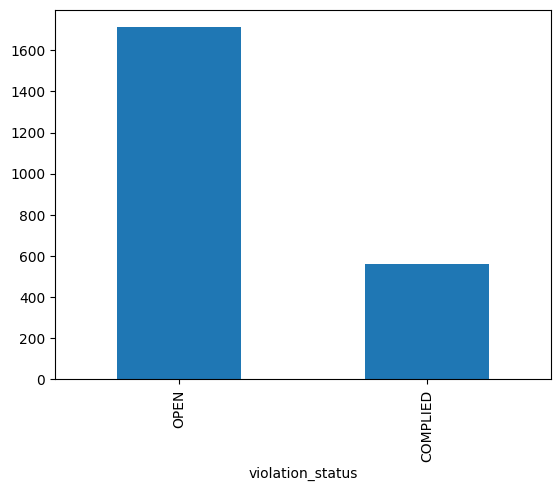

In [72]:
graph_no_heat['violation_status'].value_counts().plot(kind = 'bar')

### Join

In [73]:
#looking for other potential heat violations
build.head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,street_type,property_group,ssa,latitude,longitude,location,month,year,is_heat,month_year
0,7152896,2024-04-22T07:59:40.000,2024-04-22,CN138056,OPEN,NaN,"DEBRIS, EXCESSIVE",OTHER : :OTHER,BASEMENT AT 5801 S./ - JUNK AND REFUSE ACCUMUL...,Remove accumulation of refuse and debris and k...,...,ST,23584,59.0,41.788043,-87.698037,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024,not_heat_violation,4-2024
1,7152887,2024-04-22T07:24:30.000,2024-04-22,CN190019,OPEN,NaN,ARRANGE PREMISE INSPECTION,OTHER : :OTHER,"INTERIOR OF BUILDING - NO RESPONSE, UNABLE TO ...",Arrange for inspection of premises. (13-12-100),...,ST,369075,3.0,41.778956,-87.710901,"\n, \n(41.778955959474544, -87.71090106516559)",4,2024,not_heat_violation,4-2024
2,7152922,2024-04-22T11:07:30.000,2024-04-22,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,EAST ELEVATION / EXERIOR WALLS - MASONRY FRACT...,Failed to maintain the exterior walls of a bui...,...,AVE,361146,NaN,41.781312,-87.591520,"\n, \n(41.781312130233516, -87.59151967204005)",4,2024,not_heat_violation,4-2024
3,7153020,2024-04-22T14:21:40.000,2024-04-22,CN070014,OPEN,NaN,REPAIR EXTERIOR STAIR,OTHER : :OTHER,WEST ELEVATION / 2 CAR FRAME GARAGE / OVERHEAD...,Failed to maintain exterior stairways in safe ...,...,AVE,474372,NaN,41.724509,-87.570677,"\n, \n(41.72450871353321, -87.57067655582085)",4,2024,not_heat_violation,4-2024
4,7152893,2024-04-22T07:59:40.000,2024-04-22,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,NORTH ELEVATION 2ND FLOOR STEP CRACKS (EAST END).,Failed to maintain the exterior walls of a bui...,...,ST,23584,59.0,41.788043,-87.698037,"\n, \n(41.78804349247664, -87.69803653091098)",4,2024,not_heat_violation,4-2024


In [74]:
#looking at first dataframe for the join to make sure it matches up
graph_no_heat.head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,property_group,ssa,latitude,longitude,location,month,year,is_heat,month_year,heat_violation_counts
29,7152814,2024-04-22T11:24:24.000,2024-04-22,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,INTERIOR:001 :ENTIRE SINGLE FAMILY HOME AND BA...,"2316 W / ALL ROOMS - 57F AT 11:10AM, BASEMENT ...",Heat dwelling unit adequately from September 1...,...,255742,NaN,41.871463,-87.684518,"\n, \n(41.87146304476723, -87.68451837447857)",4,2024,heat_violation,4-2024,1
659,7148900,2024-04-15T09:05:32.000,2024-04-15,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,INTERIOR:002 :,1263 S CENTRAL PARK APT 2 / ALL ROOMS 72F DEGR...,Heat dwelling unit adequately from September 1...,...,15707,NaN,41.864450,-87.715218,"\n, \n(41.864450173563014, -87.71521848941047)",4,2024,heat_violation,4-2024,1
1358,7145591,2024-04-08T14:44:35.000,2024-04-08,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,INTERIOR:002 :,2207 S / APT.2 / ALL ROOMS - 64F DEGREES; AT (...,Heat dwelling unit adequately from September 1...,...,26373,NaN,41.851364,-87.718497,"\n, \n(41.85136381385009, -87.71849743242603)",4,2024,heat_violation,4-2024,1
1399,7146237,2024-04-08T13:05:35.000,2024-04-08,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,OTHER : :OTHER,CB132016 - 2ND FLOOR BEDROOMS TEMP WAS 66F AT ...,Heat dwelling unit adequately from September 1...,...,397833,NaN,41.770705,-87.658975,"\n, \n(41.77070465111202, -87.65897462365271)",4,2024,heat_violation,4-2024,1
1697,7144544,2024-04-04T11:01:03.000,2024-04-04,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,INTERIOR:001 :,APT. 7655-1ST FLOOR - ROOM TEMPERATURES WERE 4...,Heat dwelling unit adequately from September 1...,...,423052,NaN,41.754399,-87.650055,"\n, \n(41.754399006032756, -87.65005481133355)",4,2024,heat_violation,4-2024,1


In [75]:
#creating a new data frame to select another violation code that may contribute to lack of heat
graph_heat_extra = build[build['violation_code'] == 'CN104015']

In [76]:
#checking the new data frame
graph_heat_extra.head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,street_type,property_group,ssa,latitude,longitude,location,month,year,is_heat,month_year
21,7153021,2024-04-22T14:21:40.000,2024-04-22,CN104015,OPEN,NaN,"REPLCE WINDOW PANES, PLEXGLAS",OTHER : :OTHER,SFH - REAR WINDOW - BROKEN PANE.,"Replace broken, missing or defective window pa...",...,AVE,474372,NaN,41.724509,-87.570677,"\n, \n(41.72450871353321, -87.57067655582085)",4,2024,not_heat_violation,4-2024
88,7152228,2024-04-19T13:45:42.000,2024-04-19,CN104015,OPEN,NaN,"REPLCE WINDOW PANES, PLEXGLAS",EXTERIOR:S :,SOUTH GRADE ELEVATION - BROKEN GLASS BLOCKS.,"Replace broken, missing or defective window pa...",...,AVE,291383,NaN,41.836362,-87.642436,"\n, \n(41.836361826836246, -87.64243602266724)",4,2024,not_heat_violation,4-2024
168,7152023,2024-04-18T11:20:12.000,2024-04-18,CN104015,OPEN,NaN,"REPLCE WINDOW PANES, PLEXGLAS",EXTERIOR:W :,WEST/3RD FLOOR - WINDOWS - MISSING PANES; BOAR...,"Replace broken, missing or defective window pa...",...,ST,20525,51.0,41.754830,-87.604889,"\n, \n(41.75483010589746, -87.60488898016472)",4,2024,not_heat_violation,4-2024
194,7152152,2024-04-18T12:31:49.000,2024-04-18,CN104015,OPEN,NaN,"REPLCE WINDOW PANES, PLEXGLAS",OTHER : :OTHER,EAST 1ST FLOOR - BROKEN GLASS PANE.,"Replace broken, missing or defective window pa...",...,ST,270853,NaN,41.858417,-87.677571,"\n, \n(41.85841683615447, -87.67757106811183)",4,2024,not_heat_violation,4-2024
196,7152625,2024-04-18T14:57:14.000,2024-04-18,CN104015,OPEN,NaN,"REPLCE WINDOW PANES, PLEXGLAS",EXTERIOR:S :,"1ST, 2ND FLOOR/WINDOWS - BROKEN PANES","Replace broken, missing or defective window pa...",...,ST,537085,NaN,41.670690,-87.637530,"\n, \n(41.6706901886157, -87.63753035686139)",4,2024,not_heat_violation,4-2024


In [77]:
#combining the new violation code with the original heat violation code through a join to see them all together
left_join = pd.merge(graph_no_heat, graph_heat_extra, how = 'left', on = 'id')

In [78]:
#checking the join to make sure it came out as desired
left_join.head()

,id,violation_last_modified_date_x,violation_date_x,violation_code_x,violation_status_x,violation_status_date_x,violation_description_x,violation_location_x,violation_inspector_comments_x,violation_ordinance_x,...,street_type_y,property_group_y,ssa_y,latitude_y,longitude_y,location_y,month_y,year_y,is_heat_y,month_year_y
0,7152814,2024-04-22T11:24:24.000,2024-04-22,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,INTERIOR:001 :ENTIRE SINGLE FAMILY HOME AND BA...,"2316 W / ALL ROOMS - 57F AT 11:10AM, BASEMENT ...",Heat dwelling unit adequately from September 1...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7148900,2024-04-15T09:05:32.000,2024-04-15,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,INTERIOR:002 :,1263 S CENTRAL PARK APT 2 / ALL ROOMS 72F DEGR...,Heat dwelling unit adequately from September 1...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7145591,2024-04-08T14:44:35.000,2024-04-08,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,INTERIOR:002 :,2207 S / APT.2 / ALL ROOMS - 64F DEGREES; AT (...,Heat dwelling unit adequately from September 1...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7146237,2024-04-08T13:05:35.000,2024-04-08,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,OTHER : :OTHER,CB132016 - 2ND FLOOR BEDROOMS TEMP WAS 66F AT ...,Heat dwelling unit adequately from September 1...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7144544,2024-04-04T11:01:03.000,2024-04-04,CN132016,OPEN,NaN,HEAT UNIT ADEQUATELY,INTERIOR:001 :,APT. 7655-1ST FLOOR - ROOM TEMPERATURES WERE 4...,Heat dwelling unit adequately from September 1...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
